#  Instalação de Pacotes

In [5]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install openpyxl
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Importação de Bibliotecas

In [6]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuração de estilo para gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline


# Importação e combinação das tabelas

In [7]:
# Lista de arquivos Excel
files = ['Consumo 2019.xlsx', 'Consumo 2020.xlsx', 'Consumo 2021.xlsx', 'Consumo 2022.xlsx', 'Consumo 2023.xlsx', 'Consumo 2024.xlsx']

# Lista para armazenar os DataFrames
dfs = []

# Loop para ler cada arquivo e adicionar à lista
for file in files:
    df_temp = pd.read_excel(file, header=1)  # Usando a segunda linha como cabeçalho
    
    # Verificar e corrigir o tipo de dado da coluna de data
    if 'Data Mov.' in df_temp.columns:
        df_temp['Data Mov.'] = pd.to_datetime(df_temp['Data Mov.'], errors='coerce')
    
    dfs.append(df_temp)

# Concatenar todos os DataFrames em um único DataFrame
df_combined = pd.concat(dfs, ignore_index=True)

# Exibir as primeiras linhas do DataFrame combinado para verificar
df_combined.head(), df_combined.columns

# Verificar a estrutura das colunas
df_combined.info()

# Descrição estatística das variáveis numéricas
df_combined.describe()

df = df_combined


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125484 entries, 0 to 125483
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Cod. Estruturado Produto  125484 non-null  object        
 1   Cód Reduzido Produto      125484 non-null  int64         
 2   Descrição                 125484 non-null  object        
 3   Unid. Medida              125484 non-null  object        
 4   Data Mov.                 125484 non-null  datetime64[ns]
 5   Histórico                 125484 non-null  object        
 6   Documento                 125484 non-null  int64         
 7   Qtde Saída                125484 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB


# Busca por valores ausentes

In [8]:
# Detectando valores ausentes no dataset
missing_values = df.isnull().sum()

# Exibindo apenas as colunas com valores ausentes
missing_values[missing_values > 0]


Series([], dtype: int64)

Não há valores ausentes

# Histogramas das variáveis numéricas

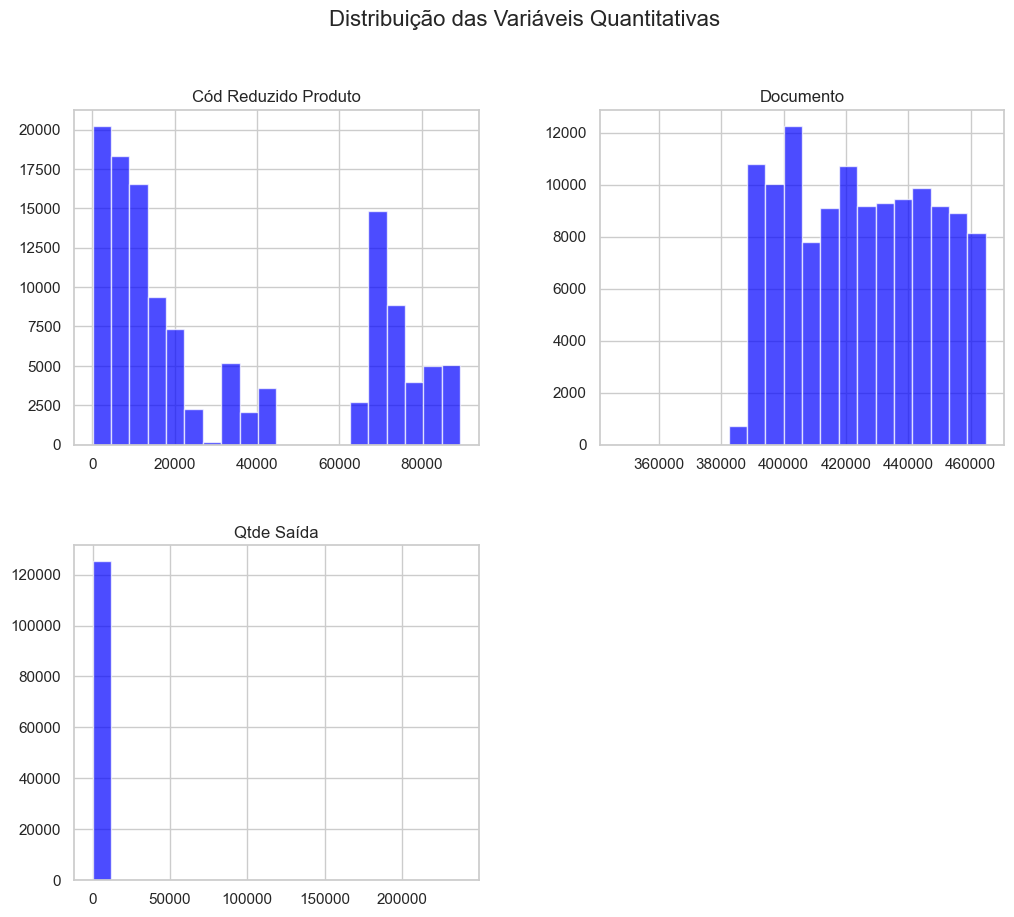

In [9]:
# Selecionando as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Plotando histogramas para as variáveis numéricas
numeric_columns.hist(figsize=(12, 10), bins=20, color='blue', alpha=0.7)
plt.suptitle('Distribuição das Variáveis Quantitativas', fontsize=16)
plt.show()


# Boxplot para Outliers

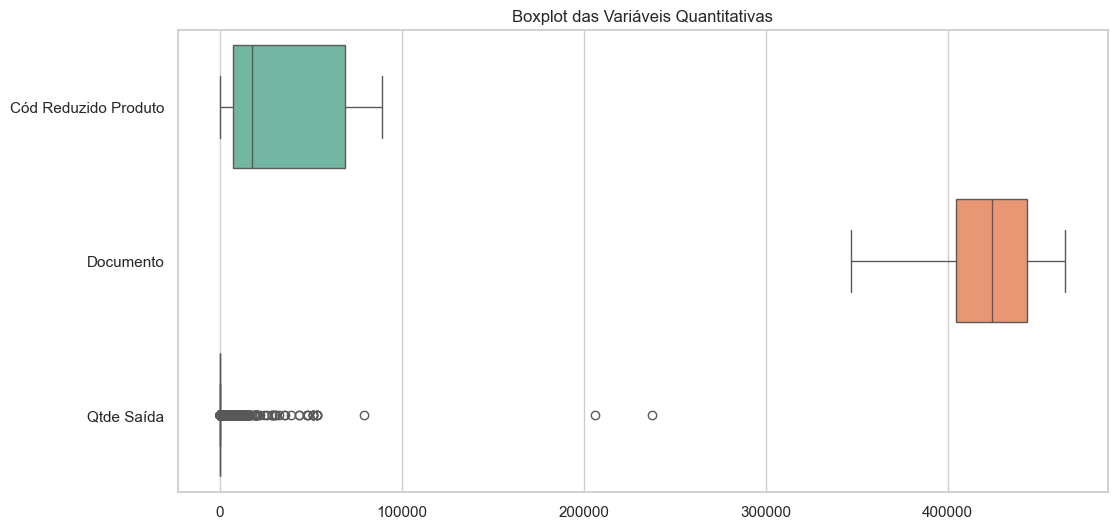

In [10]:
# Verificando se há colunas numéricas para o boxplot
if not numeric_columns.empty:
    # Boxplot para verificar a presença de outliers nas variáveis quantitativas
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_columns, orient="h", palette="Set2")
    plt.title('Boxplot das Variáveis Quantitativas')
    plt.show()
else:
    print("Nenhuma coluna numérica disponível para gerar o boxplot.")


# Gráficos com as colunas categóricas

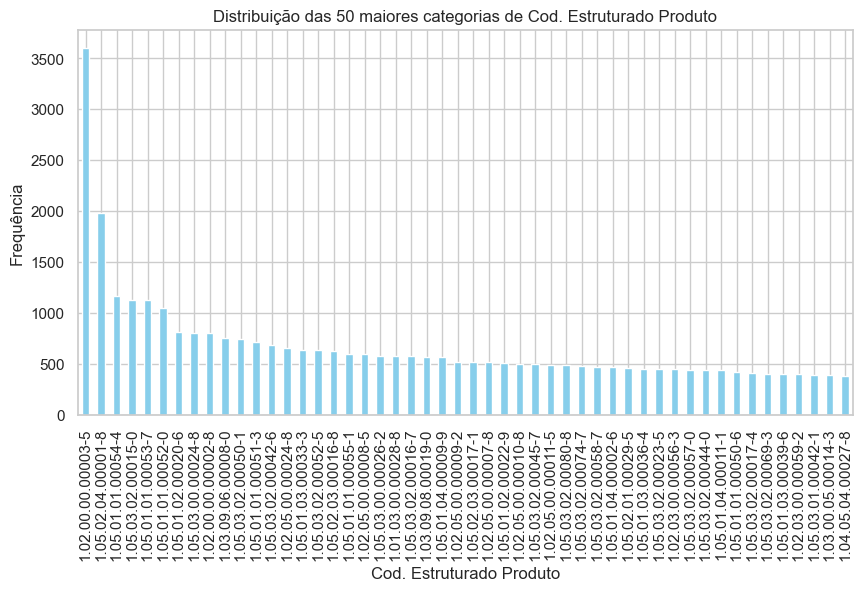

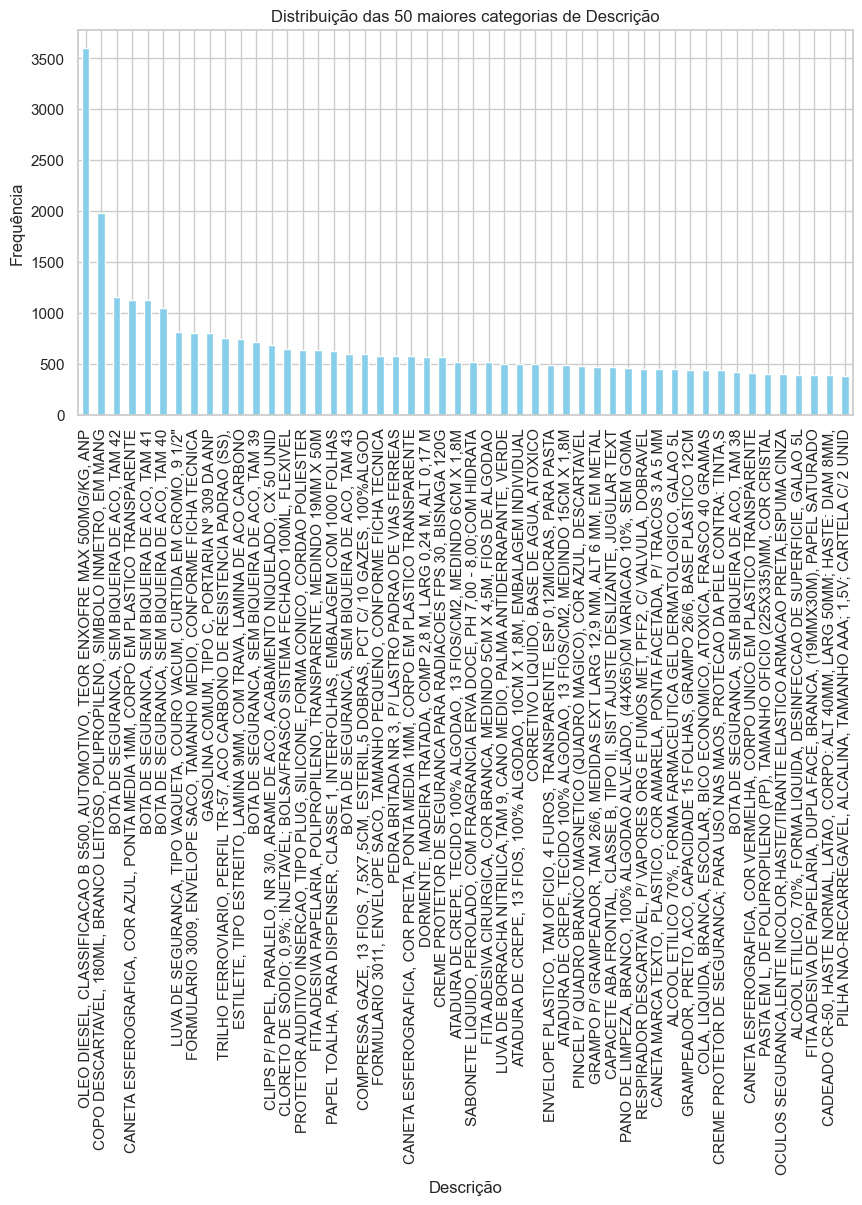

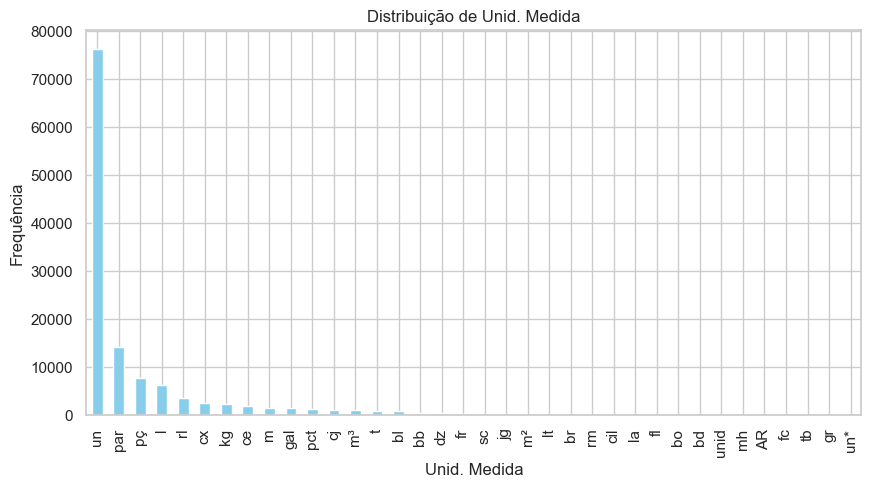

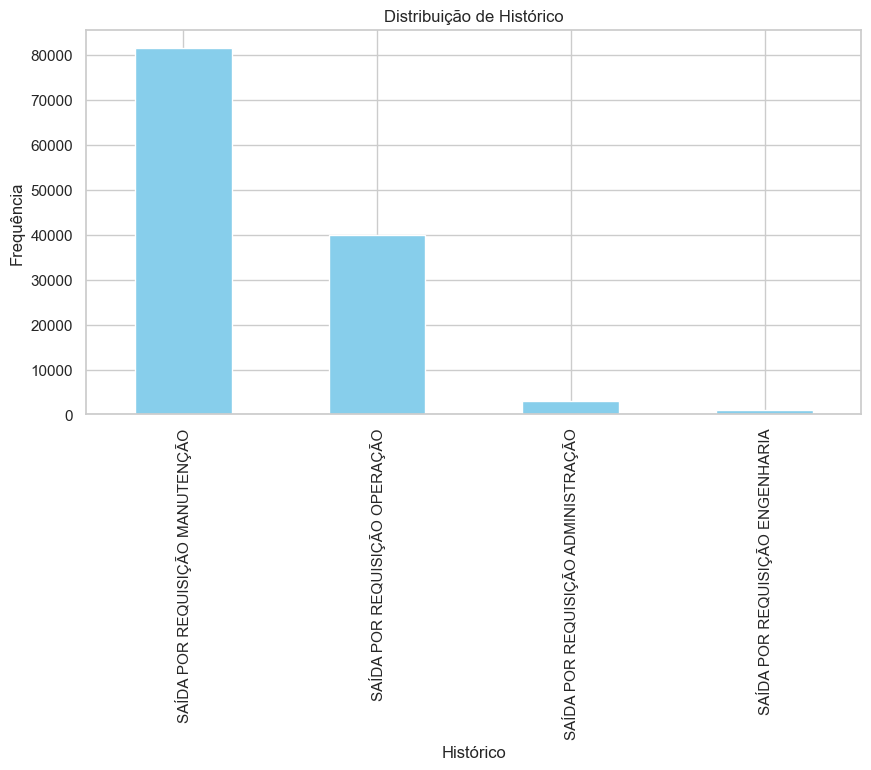

In [11]:
# Verificando as colunas categóricas, reduzi pra somente 50 porque era muita coisa no gráfico
categorical_columns = df.select_dtypes(include=['object'])

# Exibindo gráficos de barras para as colunas categóricas
for col in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    
    # Verificar o número de categorias na coluna
    if df[col].nunique() > 50:
        # Se tiver mais de 50 categorias, exibir apenas as 50 mais frequentes
        df[col].value_counts().head(50).plot(kind='bar', color='skyblue')
        plt.title(f'Distribuição das 50 maiores categorias de {col}')
    else:
        # Se tiver até 50 categorias, exibir todas
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribuição de {col}')
    
    plt.ylabel('Frequência')
    plt.show()


# Função de Detecção de Outliers com IQR

In [12]:
# Função para identificar outliers usando a regra de IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Q1: {Q1}, Q3: {Q3}")
    print(f"IQR (Intervalo Interquartil): {IQR}")
    print(f"Limite Inferior (Lower Bound): {lower_bound}")
    print(f"Limite Superior (Upper Bound): {upper_bound}")
    return data[(data < lower_bound) | (data > upper_bound)]

# Detectando os outliers na coluna 'Qtde Saída'
outliers = detect_outliers(df['Qtde Saída'])

# Exibindo as transações com outliers e as variáveis envolvidas
outliers_data = df[df['Qtde Saída'].isin(outliers)]
print("Transações com Outliers:")
print(outliers_data)
outliers_data.head()


Q1: 2.0, Q3: 20.52
IQR (Intervalo Interquartil): 18.52
Limite Inferior (Lower Bound): -25.78
Limite Superior (Upper Bound): 48.3
Transações com Outliers:
       Cod. Estruturado Produto  Cód Reduzido Produto  \
0            1.01.00.00.00018-2                   131   
2            1.01.00.00.00018-2                   131   
31           1.01.00.00.00036-6                  1371   
34           1.01.00.00.00036-6                  1371   
37           1.01.00.00.00039-7                  1379   
...                         ...                   ...   
125448       1.06.04.01.00238-3                 78109   
125451       1.06.04.01.00278-9                 84780   
125452       1.06.04.01.00279-2                 84781   
125468       1.06.04.04.00053-2                 19891   
125482       1.09.03.02.00151-0                 79064   

                                                Descrição Unid. Medida  \
0       VERGALHAO, ACO, PESO 2,94KG, DIAM 6,3MM, COMP ...           kg   
2       VERGA

,Cod. Estruturado Produto,Cód Reduzido Produto,Descrição,Unid. Medida,Data Mov.,Histórico,Documento,Qtde Saída
0,1.01.00.00.00018-2,131,"VERGALHAO, ACO, PESO 2,94KG, DIAM 6,3MM, COMP ...",kg,2019-05-06,SAÍDA POR REQUISIÇÃO MANUTENÇÃO,393022,58.8
2,1.01.00.00.00018-2,131,"VERGALHAO, ACO, PESO 2,94KG, DIAM 6,3MM, COMP ...",kg,2019-11-25,SAÍDA POR REQUISIÇÃO MANUTENÇÃO,401140,88.2
31,1.01.00.00.00036-6,1371,"BARRA CHATA, PESO BARRA 7,62KG, COMP 6 M, 1"" X...",kg,2019-10-10,SAÍDA POR REQUISIÇÃO MANUTENÇÃO,395820,228.6
34,1.01.00.00.00036-6,1371,"BARRA CHATA, PESO BARRA 7,62KG, COMP 6 M, 1"" X...",kg,2019-12-16,SAÍDA POR REQUISIÇÃO MANUTENÇÃO,401201,762.0
37,1.01.00.00.00039-7,1379,"BARRA CHATA, ACO SAE 1020, ESP 1/8"", LARG 3/4""...",kg,2019-10-10,SAÍDA POR REQUISIÇÃO MANUTENÇÃO,395820,84.6


In [13]:
# Exibir os nomes exatos das colunas
print(df.columns)


Index(['Cod. Estruturado Produto', 'Cód Reduzido Produto', 'Descrição',
       'Unid. Medida', 'Data Mov.', 'Histórico', 'Documento', 'Qtde Saída'],
      dtype='object')


# Heatmap da relação produtos mais frequêntes X unidade de medida

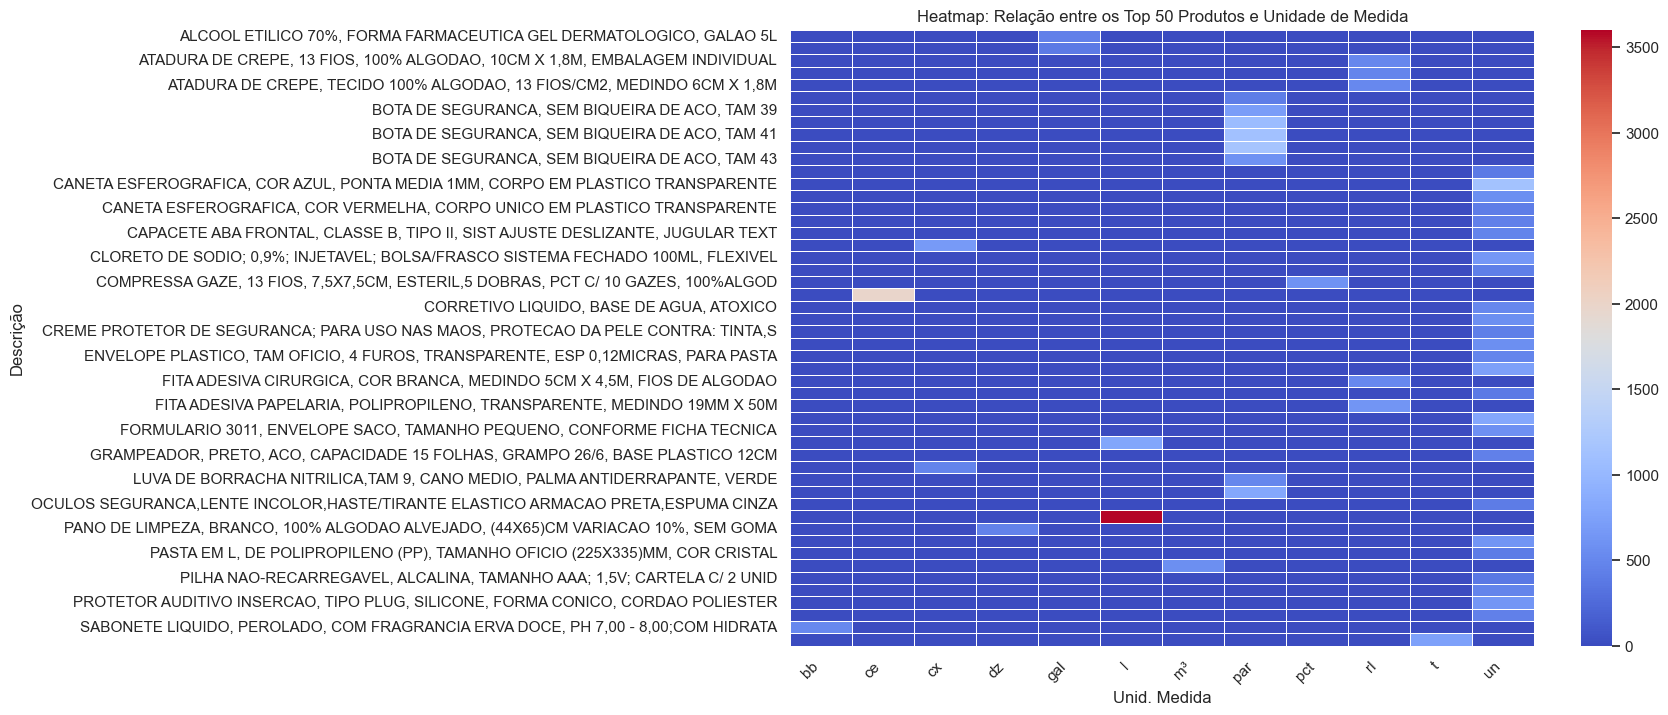

In [14]:
# Selecionar os 50 produtos mais frequentes
top_produtos = df['Descrição'].value_counts().index[:50]

# Filtrar o DataFrame para esses produtos
df_top = df[df['Descrição'].isin(top_produtos)]

# Criar a tabela cruzada (cross-tabulation)
cross_tab_top = pd.crosstab(df_top['Descrição'], df_top['Unid. Medida'])

# Visualizar uma heatmap dessa relação com os top 50 produtos
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_top, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap: Relação entre os Top 50 Produtos e Unidade de Medida')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


# Matriz de correlação

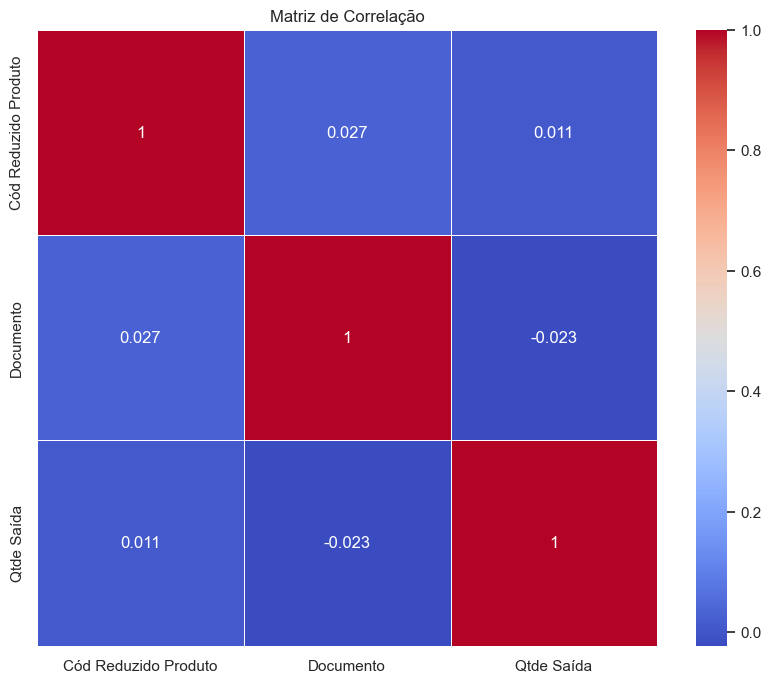

In [15]:
# Calculando a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Visualizando a matriz de correlação com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


# PCA com componentes principais

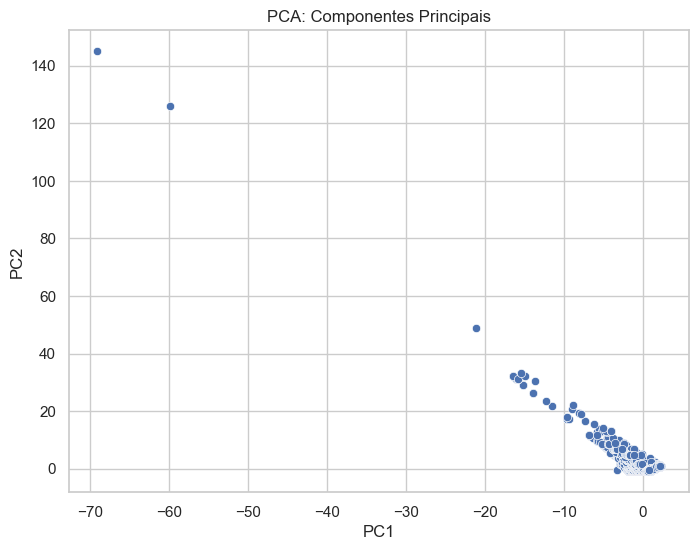

In [16]:
# Padronizando os dados antes do PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Aplicando o PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Criando um DataFrame com os componentes principais
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plotando os componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA: Componentes Principais')
plt.show()


# Comparação do consumo em diferentes meses / anos

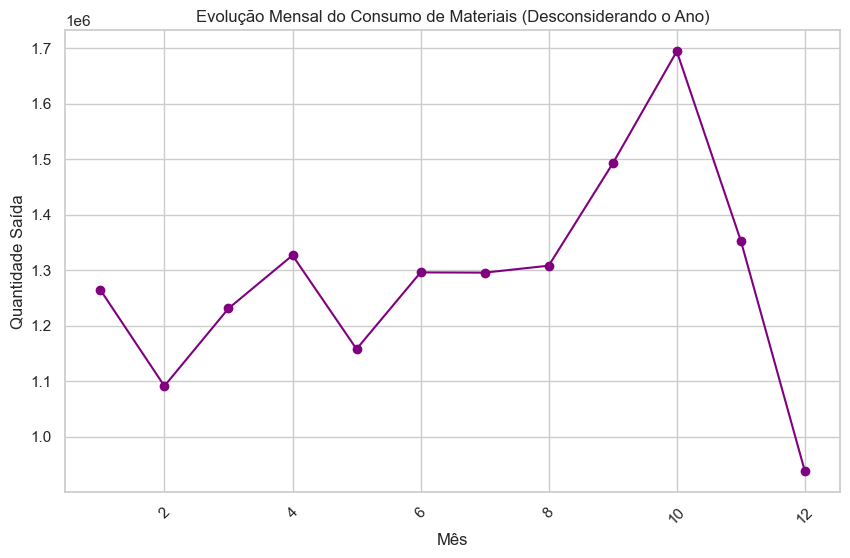

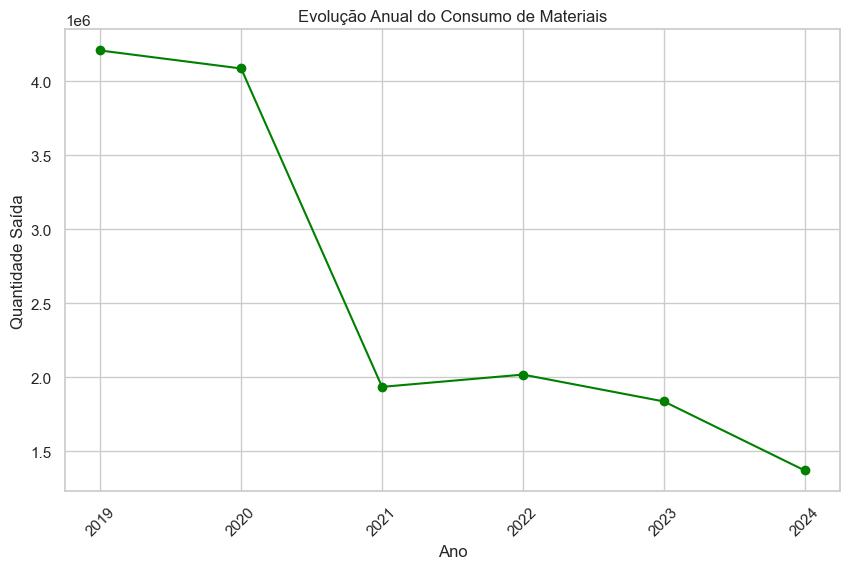

In [17]:
# Criar coluna com apenas o mês da movimentação
df['Mês'] = df['Data Mov.'].dt.month

# Agrupar por mês e somar as quantidades de saída
evolucao_mensal_sem_ano = df.groupby('Mês')['Qtde Saída'].sum()

# Plotar a evolução mensal do consumo desconsiderando o ano
plt.figure(figsize=(10, 6))
evolucao_mensal_sem_ano.plot(marker='o', color='purple')
plt.title('Evolução Mensal do Consumo de Materiais (Desconsiderando o Ano)')
plt.xlabel('Mês')
plt.ylabel('Quantidade Saída')
plt.xticks(rotation=45)
plt.show()

# Agrupar por ano e somar as quantidades de saída
df['Ano'] = df['Data Mov.'].dt.year
evolucao_anual = df.groupby('Ano')['Qtde Saída'].sum()

# Plotar a evolução anual do consumo
plt.figure(figsize=(10, 6))
evolucao_anual.plot(marker='o', color='green')
plt.title('Evolução Anual do Consumo de Materiais')
plt.xlabel('Ano')
plt.ylabel('Quantidade Saída')
plt.xticks(rotation=45)
plt.show()


# Gráfico de produtos com maior saída

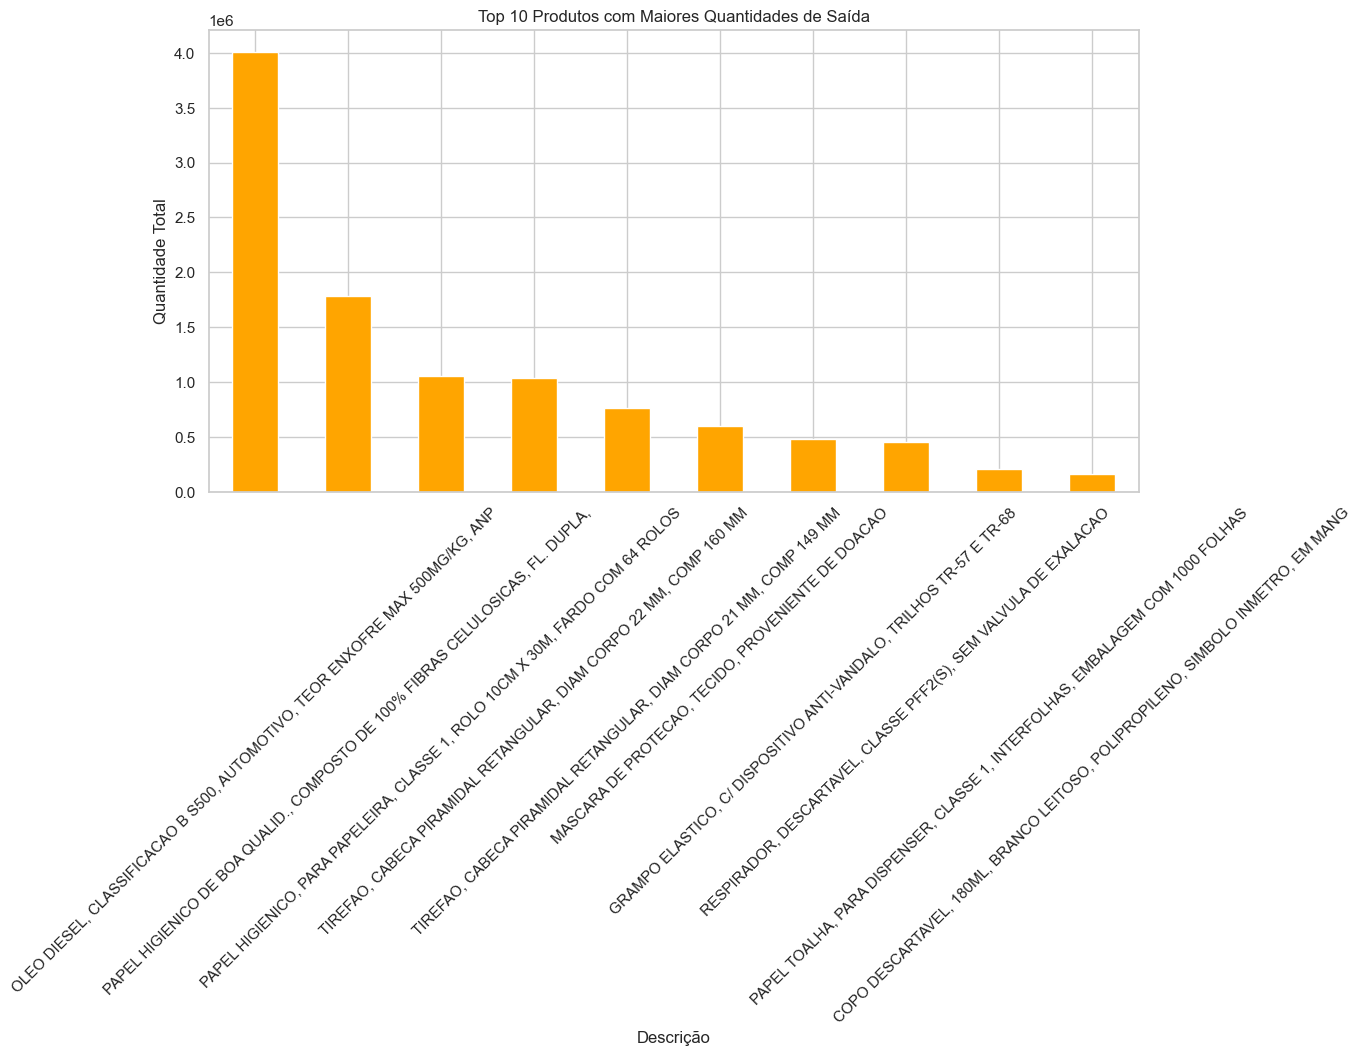

In [18]:
# Agrupando a quantidade de saída por tipo de produto
produto_quantidade = df.groupby('Descrição')['Qtde Saída'].sum().sort_values(ascending=False)

# Exibindo os 10 produtos com maiores quantidades de saída
produto_quantidade.head(10).plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Top 10 Produtos com Maiores Quantidades de Saída')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)
plt.show()


In [19]:
df.to_parquet('AED-Consumo 2019-2024.parquet', engine='pyarrow')

# Hipóteses e Conclusões 

## Hipóteses

1. **Sazonalidade no Consumo de Materiais**  
   Existe uma variação no consumo de materiais ao longo do ano, com aumento significativo em períodos de manutenção planejada ou grandes obras de expansão da infraestrutura da CPTM.

2. **Demanda Elevada por Materiais Metálicos**  
   Materiais metálicos, especialmente produtos como vergalhões de aço, possuem uma demanda superior devido à necessidade contínua de reparos e reforço da infraestrutura ferroviária.

3. **Associação entre Unidades de Medida e Tipos de Projetos**  
   O uso de diferentes unidades de medida (como kg para materiais pesados e metros para cabos e trilhos) pode indicar tipos distintos de aplicação ou projeto, variando entre manutenção, expansão ou reparos específicos.

## Conclusões

1. **Elevada Demanda por Materiais Metálicos para Manutenção**  
   Materiais metálicos, como vergalhões de aço, apresentam alta demanda, reforçando sua importância na sustentação e manutenção da estrutura ferroviária da CPTM.

2. **Padrões de Consumo Sazonal ou Emergencial**  
   Observa-se que o consumo de materiais tende a aumentar em períodos específicos, o que pode refletir a realização de manutenções preventivas ou reativas e projetos de expansão.

3. **Aumento no Consumo em Outubro e Anos de Alta Demanda (2019-2020)**  
   Há uma concentração de pedidos em outubro, possivelmente sinalizando um período de manutenção de maior porte, com os anos de 2019 e 2020 apresentando picos no consumo, o que pode estar relacionado a iniciativas de ampliação da infraestrutura ou projetos específicos.